In [898]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats
import datetime

In [829]:
# 바른양돈 데이터 불러오기
columns =['input_dt',  'feed_plan_cd','feed_plan_nm', 'farm_no', 'farm_pig_no',
       'feed_plan_pct', 'gyobae_dt', 'bunman_dt', 'wk_gubun', 'wk_dt','one_intake_kg', 'one_tm','one_kg',
       'one_now_kg', 'two_tm', 'two_kg', 'two_now_kg', 'three_tm','three_kg', 'three_now_kg', 'four_tm',
       'four_kg', 'four_now_kg','five_tm', 'five_kg', 'five_now_kg', 'warn_kg', 'min_kg', 'log_dt']
data_columns = columns + ['day_now_kg', 'B_now_kg', 'B_kg', 'B_per_now_kg','now_eudusu','now_eukg','next_bunman_sancha','next_jae','next_chongsan','next_silsan','next_eudusu']
data = pd.DataFrame(columns=data_columns)
ba_pi = pd.read_csv('./csvs/comars/pigplan_1387.csv')
ba_co = pd.read_csv('./csvs/comars/uit_feeding_hy_1387_바른양돈.csv')
ba_co = ba_co[columns]
pig_list = ba_pi['FARM_PIG_NO'].unique()
co_list = ba_co['farm_pig_no'].unique()
for pig_id in tqdm(pig_list):
    if pig_id in co_list:
        tmp_co = ba_co[ba_co['farm_pig_no'] == pig_id]
        tmp_pi = ba_pi[ba_pi['FARM_PIG_NO'] == pig_id]
        gyobaes = list(tmp_pi['GYOBAE_DT'].unique())
        gyobaes.sort()
        gyobaes_list = []
        for i in gyobaes:
            tmp_gyo = str(i)
            gyo_1 = tmp_gyo[:4]
            gyo_2 = tmp_gyo[4:6]
            gyo_3 = tmp_gyo[6:]
            gyobaes_list.append(gyo_1 + '-' + gyo_2 + '-' +gyo_3)
        for gyobae_num in range(len(gyobaes_list)):
            tmp = tmp_co[tmp_co['gyobae_dt'] == gyobaes_list[gyobae_num]]
            if tmp.empty:
                pass
            else:
                tmp = tmp[tmp['wk_gubun'] == 'B']
                now_eudusu = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num]]['EUDUSU'].values[0]
                now_eukg = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num]]['EUKG'].values[0]
                if len(gyobaes_list) > gyobae_num+1:
                    silsan = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['SILSAN'].values[0]
                    chongsan = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['CHONGSAN'].values[0]
                    eudusu = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['EUDUSU'].values[0]
                    sancha = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['BUNMAN_SANCHA'].values[0]
                    jae = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['JAE'].values[0]
                else:
                    sancha = None
                    if sancha == None:
                        silsan = None
                        chongsan = None
                        eudusu = None
                        jae = None
                tmp['now_eudusu'] = now_eudusu
                tmp['now_eukg'] = now_eukg
                tmp['next_bunman_sancha'] = sancha
                tmp['next_silsan'] = silsan
                tmp['next_chongsan'] = chongsan
                tmp['next_eudusu'] = eudusu
                tmp['next_jae'] = jae
                tmp['day_now_kg'] = tmp['one_now_kg']+tmp['two_now_kg']+tmp['three_now_kg']+tmp['four_now_kg']+tmp['five_now_kg']
                tmp['day_kg'] = tmp['one_kg']+tmp['two_kg']+tmp['three_kg']+tmp['four_kg']+tmp['five_kg']
                B_now_kg = 0
                for z in tmp['day_now_kg']:
                    B_now_kg += z
                B_kg = 0
                for z in tmp['day_kg']:
                    B_kg +=z
                if B_now_kg == 0 or Counter(tmp['day_now_kg'])[0] >= 3:
                    continue
                B_per_now_kg = (B_now_kg/B_kg)*100
                tmp['B_now_kg'] = B_now_kg
                tmp['B_kg'] = B_kg
                tmp['B_per_now_kg'] = B_per_now_kg
                data = pd.concat([data,tmp], axis = 0)


100%|██████████| 589/589 [00:06<00:00, 96.12it/s]  


In [801]:
# 논산연암 데이터 불러오기
columns =['input_dt',  'feed_plan_cd','feed_plan_nm', 'farm_no', 'farm_pig_no',
       'feed_plan_pct', 'gyobae_dt', 'bunman_dt', 'wk_gubun', 'wk_dt','one_intake_kg', 'one_tm','one_kg',
       'one_now_kg', 'two_tm', 'two_kg', 'two_now_kg', 'three_tm','three_kg', 'three_now_kg', 'four_tm',
       'four_kg', 'four_now_kg','five_tm', 'five_kg', 'five_now_kg', 'warn_kg', 'min_kg', 'log_dt']
data_columns = columns + ['day_now_kg', 'B_now_kg', 'B_kg', 'B_per_now_kg','now_eudusu','now_eukg','next_bunman_sancha','next_jae','next_chongsan','next_silsan','next_eudusu']
data = pd.DataFrame(columns=data_columns)
non_pi = pd.read_csv('./csvs/comars/pigplan_1751.csv')
non_co = pd.read_csv('./csvs/comars/uit_feeding_hy_1751_논산연암.csv')
non_co = non_co[columns]
pig_list = non_pi['FARM_PIG_NO'].unique()
co_list = non_co['farm_pig_no'].unique()
for pig_id in tqdm(pig_list):
    if pig_id in co_list:
        tmp_co = non_co[non_co['farm_pig_no'] == pig_id]
        tmp_pi = non_pi[non_pi['FARM_PIG_NO'] == pig_id]
        gyobaes = list(tmp_pi['GYOBAE_DT'].unique())
        gyobaes.sort()
        gyobaes_list = []
        for i in gyobaes:
            tmp_gyo = str(i)
            gyo_1 = tmp_gyo[:4]
            gyo_2 = tmp_gyo[4:6]
            gyo_3 = tmp_gyo[6:]
            gyobaes_list.append(gyo_1 + '-' + gyo_2 + '-' +gyo_3)
        for gyobae_num in range(len(gyobaes_list)):
            tmp = tmp_co[tmp_co['gyobae_dt'] == gyobaes_list[gyobae_num]]
            if tmp.empty:
                pass
            else:
                tmp = tmp[tmp['wk_gubun'] == 'B']
                now_eudusu = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num]]['EUDUSU'].values[0]
                now_eukg = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num]]['EUKG'].values[0]
                if len(gyobaes_list) > gyobae_num+1:
                    silsan = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['SILSAN'].values[0]
                    chongsan = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['CHONGSAN'].values[0]
                    eudusu = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['EUDUSU'].values[0]
                    sancha = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['BUNMAN_SANCHA'].values[0]
                    jae = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['JAE'].values[0]
                else:
                    sancha = None
                    if sancha == None:
                        silsan = None
                        chongsan = None
                        eudusu = None
                        jae = None
                tmp['now_eudusu'] = now_eudusu
                tmp['now_eukg'] = now_eukg
                tmp['next_bunman_sancha'] = sancha
                tmp['next_silsan'] = silsan
                tmp['next_chongsan'] = chongsan
                tmp['next_eudusu'] = eudusu
                tmp['next_jae'] = jae
                tmp['day_now_kg'] = tmp['one_now_kg']+tmp['two_now_kg']+tmp['three_now_kg']+tmp['four_now_kg']+tmp['five_now_kg']
                tmp['day_kg'] = tmp['one_kg']+tmp['two_kg']+tmp['three_kg']+tmp['four_kg']+tmp['five_kg']
                B_now_kg = 0
                for z in tmp['day_now_kg']:
                    B_now_kg += z
                B_kg = 0
                for z in tmp['day_kg']:
                    B_kg +=z
                if B_now_kg == 0 or Counter(tmp['day_now_kg'])[0] >= 3:
                    continue
                B_per_now_kg = (B_now_kg/B_kg)*100
                tmp['B_now_kg'] = B_now_kg
                tmp['B_kg'] = B_kg
                tmp['B_per_now_kg'] = B_per_now_kg
                data = pd.concat([data,tmp], axis = 0)


100%|██████████| 1751/1751 [00:16<00:00, 108.45it/s]


In [812]:
# 홍성금평 데이터 불러오기
columns =['input_dt',  'feed_plan_cd','feed_plan_nm', 'farm_no', 'farm_pig_no',
       'feed_plan_pct', 'gyobae_dt', 'bunman_dt', 'wk_gubun', 'wk_dt','one_intake_kg', 'one_tm','one_kg',
       'one_now_kg', 'two_tm', 'two_kg', 'two_now_kg', 'three_tm','three_kg', 'three_now_kg', 'four_tm',
       'four_kg', 'four_now_kg','five_tm', 'five_kg', 'five_now_kg', 'warn_kg', 'min_kg', 'log_dt']
data_columns = columns + ['day_now_kg', 'B_now_kg', 'B_kg', 'B_per_now_kg','now_eudusu','now_eukg','next_bunman_sancha','next_jae','next_chongsan','next_silsan','next_eudusu']
data = pd.DataFrame(columns=data_columns)
hong_pi = pd.read_csv('./csvs/comars/pigplan_624.csv')
hong_co = pd.read_csv('./csvs/comars/uit_feeding_hy_624_홍성금평.csv')
hong_co = hong_co[columns]
pig_list = hong_pi['FARM_PIG_NO'].unique()
co_list = hong_co['farm_pig_no'].unique()
for pig_id in tqdm(pig_list):
    if pig_id in co_list:
        tmp_co = hong_co[hong_co['farm_pig_no'] == pig_id]
        tmp_pi = hong_pi[hong_pi['FARM_PIG_NO'] == pig_id]
        gyobaes = list(tmp_pi['GYOBAE_DT'].unique())
        gyobaes.sort()
        gyobaes_list = []
        for i in gyobaes:
            tmp_gyo = str(i)
            gyo_1 = tmp_gyo[:4]
            gyo_2 = tmp_gyo[4:6]
            gyo_3 = tmp_gyo[6:]
            gyobaes_list.append(gyo_1 + '-' + gyo_2 + '-' +gyo_3)
        for gyobae_num in range(len(gyobaes_list)):
            tmp = tmp_co[tmp_co['gyobae_dt'] == gyobaes_list[gyobae_num]]
            if tmp.empty:
                pass
            else:
                tmp = tmp[tmp['wk_gubun'] == 'B']
                now_eudusu = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num]]['EUDUSU'].values[0]
                now_eukg = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num]]['EUKG'].values[0]
                if len(gyobaes_list) > gyobae_num+1:
                    silsan = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['SILSAN'].values[0]
                    chongsan = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['CHONGSAN'].values[0]
                    eudusu = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['EUDUSU'].values[0]
                    sancha = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['BUNMAN_SANCHA'].values[0]
                    jae = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['JAE'].values[0]
                else:
                    sancha = None
                    if sancha == None:
                        silsan = None
                        chongsan = None
                        eudusu = None
                        jae = None
                tmp['now_eudusu'] = now_eudusu
                tmp['now_eukg'] = now_eukg
                tmp['next_bunman_sancha'] = sancha
                tmp['next_silsan'] = silsan
                tmp['next_chongsan'] = chongsan
                tmp['next_eudusu'] = eudusu
                tmp['next_jae'] = jae
                tmp['day_now_kg'] = tmp['one_now_kg']+tmp['two_now_kg']+tmp['three_now_kg']+tmp['four_now_kg']+tmp['five_now_kg']
                tmp['day_kg'] = tmp['one_kg']+tmp['two_kg']+tmp['three_kg']+tmp['four_kg']+tmp['five_kg']
                B_now_kg = 0
                for z in tmp['day_now_kg']:
                    B_now_kg += z
                B_kg = 0
                for z in tmp['day_kg']:
                    B_kg +=z
                if B_now_kg == 0 or Counter(tmp['day_now_kg'])[0] >= 3:
                    continue
                B_per_now_kg = (B_now_kg/B_kg)*100
                tmp['B_now_kg'] = B_now_kg
                tmp['B_kg'] = B_kg
                tmp['B_per_now_kg'] = B_per_now_kg
                data = pd.concat([data,tmp], axis = 0)



100%|██████████| 458/458 [00:02<00:00, 170.92it/s] 


In [813]:
data

,input_dt,feed_plan_cd,feed_plan_nm,farm_no,farm_pig_no,feed_plan_pct,gyobae_dt,bunman_dt,wk_gubun,wk_dt,...,B_kg,B_per_now_kg,now_eudusu,now_eukg,next_bunman_sancha,next_jae,next_chongsan,next_silsan,next_eudusu,day_kg
1408,2018-08-22,B2,2산,624,34,1.0,2018-04-16,2018-08-04,B,2018-08-04,...,2178.0,6.887052,0,0.0,14,NaN,11,5,0,99.0
1435,2018-08-23,B2,2산,624,34,1.0,2018-04-16,2018-08-04,B,2018-08-04,...,2178.0,6.887052,0,0.0,14,NaN,11,5,0,99.0
1462,2018-08-24,B2,2산,624,34,1.0,2018-04-16,2018-08-04,B,2018-08-04,...,2178.0,6.887052,0,0.0,14,NaN,11,5,0,99.0
1489,2018-08-25,B2,2산,624,34,1.0,2018-04-16,2018-08-04,B,2018-08-04,...,2178.0,6.887052,0,0.0,14,NaN,11,5,0,99.0
1516,2018-08-26,B2,2산,624,34,1.0,2018-04-16,2018-08-04,B,2018-08-04,...,2178.0,6.887052,0,0.0,14,NaN,11,5,0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14472,2022-05-14,B4,지혜팜김태규,624,036-020,1.0,2021-12-25,2022-04-21,B,2022-04-21,...,2011.0,67.926405,12,0.0,None,None,None,None,None,100.0
14508,2022-05-15,B4,지혜팜김태규,624,036-020,1.0,2021-12-25,2022-04-21,B,2022-04-21,...,2011.0,67.926405,12,0.0,None,None,None,None,None,100.0
14544,2022-05-16,B4,지혜팜김태규,624,036-020,1.0,2021-12-25,2022-04-21,B,2022-04-21,...,2011.0,67.926405,12,0.0,None,None,None,None,None,100.0
14580,2022-05-17,B4,지혜팜김태규,624,036-020,1.0,2021-12-25,2022-04-21,B,2022-04-21,...,2011.0,67.926405,12,0.0,None,None,None,None,None,100.0


In [830]:
data = data.dropna()

In [831]:
test = data[['farm_pig_no','gyobae_dt','one_kg','two_kg','three_kg','four_kg','five_kg'
             ,'one_now_kg','two_now_kg','three_now_kg','four_now_kg',
             'five_now_kg','day_now_kg','B_now_kg','B_kg','B_per_now_kg','now_eudusu','now_eukg',
             'next_jae','next_chongsan','next_silsan',
             'next_eudusu','next_bunman_sancha']]

In [832]:
test

,farm_pig_no,gyobae_dt,one_kg,two_kg,three_kg,four_kg,five_kg,one_now_kg,two_now_kg,three_now_kg,...,B_now_kg,B_kg,B_per_now_kg,now_eudusu,now_eukg,next_jae,next_chongsan,next_silsan,next_eudusu,next_bunman_sancha
1323,58-125,2017-09-04,2,2,2,2,2,2,2,2,...,1070,1294,82.689335,10,60.0,5.0,19,15,11,8
1343,58-125,2017-09-04,2,2,2,2,2,2,2,2,...,1070,1294,82.689335,10,60.0,5.0,19,15,11,8
1363,58-125,2017-09-04,2,2,2,2,2,2,2,2,...,1070,1294,82.689335,10,60.0,5.0,19,15,11,8
1383,58-125,2017-09-04,4,2,2,4,4,4,2,2,...,1070,1294,82.689335,10,60.0,5.0,19,15,11,8
1403,58-125,2017-09-04,6,4,2,4,4,6,4,2,...,1070,1294,82.689335,10,60.0,5.0,19,15,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35691,100-87,2021-05-12,26,20,20,24,10,2,20,20,...,734,1534,47.848761,9,48.6,6.0,5,5,5,2
35714,100-87,2021-05-12,26,20,20,24,10,16,20,20,...,734,1534,47.848761,9,48.6,6.0,5,5,5,2
35737,100-87,2021-05-12,26,20,20,24,10,18,20,0,...,734,1534,47.848761,9,48.6,6.0,5,5,5,2
35760,100-87,2021-05-12,26,20,20,24,10,0,0,0,...,734,1534,47.848761,9,48.6,6.0,5,5,5,2


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff728451a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff72848d790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff727da3f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff728cf1a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff727e3c310>],
 'means': []}

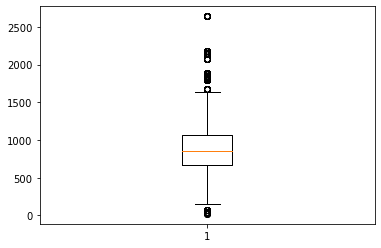

In [326]:
plt.hist

In [226]:
analysis_data_columns = ['feed_plan_pct','one_now_kg','two_now_kg','three_now_kg','four_now_kg',
                          'five_now_kg','next_jae','next_chongsan','next_silsan','next_eudusu']


In [227]:
# get_outlier 이상치 제거 함수
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [628]:
outlier_idx = get_outlier(df = test, column = 'B_now_kg',weight=1.5)
test.drop(outlier_idx, axis = 0, inplace = True)

/tmp/ipykernel_27011/3700238663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(outlier_idx, axis = 0, inplace = True)


In [583]:
pig_gyo_list = []
test_tmp = pd.DataFrame(columns=['farm_pig_no','gyobae_dt','one_now_kg','two_now_kg','three_now_kg',
                                 'four_now_kg','five_now_kg','day_now_kg','B_now_kg','B_kg','B_per_now_kg'
                                 'now_eudusu','next_jae','next_chongsan','next_silsan','next_eudusu'])

for i in test['farm_pig_no'].unique():
    tmp =test[test['farm_pig_no'] == i]
    for j in tmp['gyobae_dt'].unique():
        pig_gyo_list.append(len(tmp[tmp['gyobae_dt'] == j]))
result = Counter(pig_gyo_list)

for i in test['farm_pig_no'].unique():
    tmp =test[test['farm_pig_no'] == i]
    for j in tmp['gyobae_dt'].unique():
        tt = tmp[tmp['gyobae_dt'] == j]
        test_tmp = pd.concat([test_tmp,tt], axis= 0)
print(result)

Counter({20: 122, 21: 116, 19: 111, 22: 98, 23: 80, 18: 79, 24: 56, 25: 38, 16: 31, 26: 31, 17: 27, 15: 10, 27: 10, 28: 8, 9: 5, 11: 5, 13: 5, 29: 5, 31: 4, 12: 4, 14: 3, 32: 2, 8: 1, 3: 1, 34: 1, 39: 1, 30: 1})


### 분만사에 며칠 있었는지에 맞춰 따로 확인해보자!

In [584]:
pig_gyo_list = []
test_tmp = pd.DataFrame(columns=['farm_pig_no','gyobae_dt','one_now_kg','two_now_kg','three_now_kg',
                                 'four_now_kg','five_now_kg','day_now_kg','B_now_kg','B_kg','B_per_now_kg'
                                 'now_eudusu','next_jae','next_chongsan','next_silsan','next_eudusu'])

for i in test['farm_pig_no'].unique():
    tmp =test[test['farm_pig_no'] == i]
    for j in tmp['gyobae_dt'].unique():
        pig_gyo_list.append(len(tmp[tmp['gyobae_dt'] == j]))
result = Counter(pig_gyo_list)

for i in test['farm_pig_no'].unique():
    tmp =test[test['farm_pig_no'] == i]
    for j in tmp['gyobae_dt'].unique():
        if len(tmp[tmp['gyobae_dt'] == j]) == 20:
            tt = tmp[tmp['gyobae_dt'] == j]
            test_tmp = pd.concat([test_tmp,tt], axis= 0)
print(result)

Counter({20: 122, 21: 116, 19: 111, 22: 98, 23: 80, 18: 79, 24: 56, 25: 38, 16: 31, 26: 31, 17: 27, 15: 10, 27: 10, 28: 8, 9: 5, 11: 5, 13: 5, 29: 5, 31: 4, 12: 4, 14: 3, 32: 2, 8: 1, 3: 1, 34: 1, 39: 1, 30: 1})


In [273]:
test_tmp.columns

Index(['farm_pig_no', 'gyobae_dt', 'one_now_kg', 'two_now_kg', 'three_now_kg',
       'four_now_kg', 'five_now_kg', 'day_now_kg', 'B_now_kg', 'B_kg',
       'B_per_now_kgnext_jae', 'next_chongsan', 'next_silsan', 'next_eudusu',
       'B_per_now_kg', 'next_jae', 'next_bunman_sancha'],
      dtype='object')

In [274]:
test_tmp['farm_pig_no'].value_counts()

82-188    60
27-18     60
42-20     60
13-171    60
13-106    40
          ..
40-71     20
36-185    20
54-111    20
58-118    20
17-125    20
Name: farm_pig_no, Length: 66, dtype: int64

In [301]:
test_tmp = test_tmp.drop_duplicates(['farm_pig_no','gyobae_dt'])

outlier_idx = get_outlier(df = test_tmp, column = 'B_now_kg',weight=1.5)
test_tmp.drop(outlier_idx, axis = 0, inplace = True)

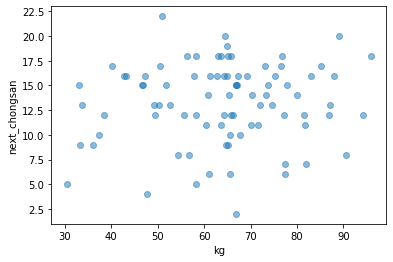

상관계수 :  0.09536407352391318


In [276]:
X = test_tmp['B_now_kg'].astype('int')
X1 = test_tmp['B_per_now_kg'].astype('float')
Y = test_tmp['next_chongsan'].astype('int')
plt.scatter(X1,Y, alpha=0.5)
plt.xlabel('kg')
plt.ylabel('next_chongsan')
plt.show()
print('상관계수 : ',np.corrcoef(X1,Y)[0,1])

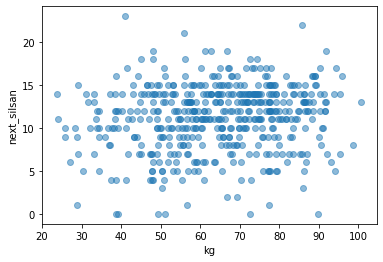

상관계수 :  0.14818392334778846


In [252]:
X = test_tmp['B_now_kg'].astype('int')
X1 = test_tmp['B_per_now_kg'].astype('float')
Y = test_tmp['next_silsan'].astype('int')
plt.scatter(X1,Y, alpha=0.5)
plt.xlabel('kg')
plt.ylabel('next_silsan')
plt.show()
print('상관계수 : ',np.corrcoef(X1,Y)[0,1])

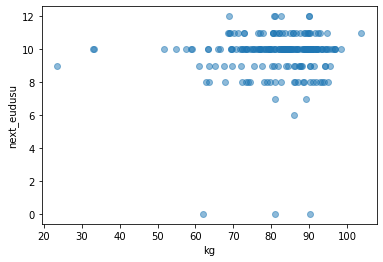

상관계수 :  0.0438937940951717


In [213]:
X = test_tmp['B_now_kg'].astype('int')
X1 = test_tmp['B_per_now_kg'].astype('float')
Y = test_tmp['next_eudusu'].astype('int')
plt.scatter(X1,Y, alpha=0.5)
plt.xlabel('kg')
plt.ylabel('next_eudusu')
plt.show()
print('상관계수 : ',np.corrcoef(X1,Y)[0,1])

In [214]:
pig_gyo_list_test = []
for i in test_tmp['farm_pig_no'].unique():
    tmp =test_tmp[test_tmp['farm_pig_no'] == i]
    for j in tmp['gyobae_dt'].unique():
        pig_gyo_list_test.append(len(tmp[tmp['gyobae_dt'] == j]))

In [215]:
result = Counter(pig_gyo_list_test)

In [216]:
result

Counter({1: 210})

### 분만 후 21일, 20일 까지의 데이터만 잘라서 확인!

In [886]:
pig_gyo_list = []
test_tmp = pd.DataFrame(columns=['farm_pig_no','gyobae_dt',
                                 'one_kg','two_kg','three_kg','four_kg','five_kg',
                                 'one_now_kg','two_now_kg','three_now_kg',
                                 'four_now_kg','five_now_kg','day_now_kg','B_now_kg','B_kg','B_per_now_kg',
                                 'now_eukg','now_eudusu','next_jae','next_chongsan','next_silsan','next_eudusu','next_bunman_sancha'])

for i in test['farm_pig_no'].unique():
    tmp =test[test['farm_pig_no'] == i]
    for j in tmp['gyobae_dt'].unique():
        pig_gyo_list.append(len(tmp[tmp['gyobae_dt'] == j]))
result = Counter(pig_gyo_list)

for i in test['farm_pig_no'].unique():
    tmp =test[test['farm_pig_no'] == i]
    for j in tmp['gyobae_dt'].unique():
        if len(tmp[tmp['gyobae_dt'] == j]) >= 24:
            tt = tmp[tmp['gyobae_dt'] == j][:24]
            tt['day_now_kg'] = tt['one_now_kg']+tt['two_now_kg']+tt['three_now_kg']+tt['four_now_kg']+tt['five_now_kg']
            tt['day_kg'] = tt['one_kg']+tt['two_kg']+tt['three_kg']+tt['four_kg']+tt['five_kg']
            B_now_kg = 0
            for z in tt['day_now_kg']:
                B_now_kg += z
            B_kg = 0
            for z in tt['day_kg']:
                B_kg +=z
            if B_now_kg == 0 or Counter(tt['day_now_kg'])[0] >= 3:
                continue
            B_per_now_kg = (B_now_kg/B_kg)*100
            tt['B_now_kg'] = B_now_kg
            tt['B_kg'] = B_kg
            tt['B_per_now_kg'] = B_per_now_kg
            test_tmp = pd.concat([test_tmp,tt], axis= 0)
print(result)

Counter({20: 86, 19: 85, 21: 83, 22: 70, 23: 57, 18: 49, 24: 39, 26: 27, 25: 27, 16: 22, 17: 17, 27: 11, 15: 8, 28: 6, 29: 5, 31: 4, 13: 4, 14: 2, 12: 2, 38: 2, 9: 2, 36: 1, 5: 1, 43: 1, 33: 1, 3: 1, 34: 1, 37: 1, 32: 1, 39: 1, 11: 1, 30: 1, 2: 1})


In [887]:
test_tmp = test_tmp.drop_duplicates(['farm_pig_no','gyobae_dt'])

outlier_idx = get_outlier(df = test_tmp, column = 'B_now_kg',weight=1.5)
test_tmp.drop(outlier_idx, axis = 0, inplace = True)

outlier_idx = get_outlier(df = test_tmp, column = 'B_per_now_kg',weight=1.5)
test_tmp.drop(outlier_idx, axis = 0, inplace = True)

outlier_idx = get_outlier(df = test_tmp, column = 'now_eukg',weight=1.5)
test_tmp.drop(outlier_idx, axis = 0, inplace = True)

In [888]:
test_tmp

,farm_pig_no,gyobae_dt,one_kg,two_kg,three_kg,four_kg,five_kg,one_now_kg,two_now_kg,three_now_kg,...,B_kg,B_per_now_kg,now_eukg,now_eudusu,next_jae,next_chongsan,next_silsan,next_eudusu,next_bunman_sancha,day_kg
29196,58-118,2020-09-26,6,6,6,6,6,6,2,6,...,1634,48.225214,55.0,11,6.0,9,6,10,15,30
29241,58-35,2020-09-29,6,6,6,6,6,6,6,6,...,1634,77.600979,71.5,11,4.0,19,15,9,15,30
4613,60-16,2018-01-05,2,2,2,2,2,2,2,2,...,1614,67.410161,88.0,11,40.0,10,10,9,8,10
1458,55-18,2017-09-12,2,2,2,2,2,2,2,2,...,1614,62.825279,52.0,10,28.0,13,11,10,7,10
29259,54-62,2020-09-28,6,6,6,6,6,6,6,6,...,1634,55.569155,48.6,9,32.0,8,8,8,15,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31370,100-16,2020-12-18,6,6,6,6,6,2,2,2,...,1634,42.839657,43.4,7,5.0,0,0,0,2,30
37229,100-61,2021-07-27,6,6,6,6,6,6,6,6,...,1634,81.028152,64.0,8,6.0,9,8,9,3,30
36632,48-156,2021-07-05,6,6,6,6,6,6,6,6,...,1634,61.321909,55.0,10,5.0,17,13,10,2,30
35963,50-101,2021-06-07,6,6,6,6,6,6,6,6,...,1634,55.446756,67.2,12,5.0,17,13,10,2,30


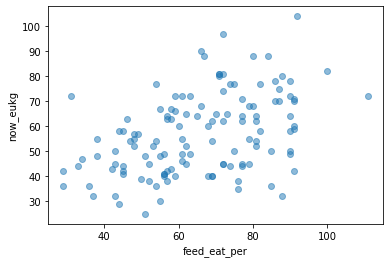

상관계수 :  0.43712294965622595
(0.4371229496562262, 2.771927074628505e-07)


In [894]:
eu_0_idx = test_tmp[test_tmp['now_eukg'] == 0].index
test_tmp_2 = test_tmp.drop(eu_0_idx, axis = 0)
X = test_tmp_2['B_per_now_kg'].astype('int')
Y = test_tmp_2['now_eukg'].astype('int')
plt.scatter(X,Y, alpha=0.5)
plt.xlabel('feed_eat_per')
plt.ylabel('now_eukg')
plt.show()
print('상관계수 : ',np.corrcoef(X,Y)[0,1])
print(stats.pearsonr(X,Y))

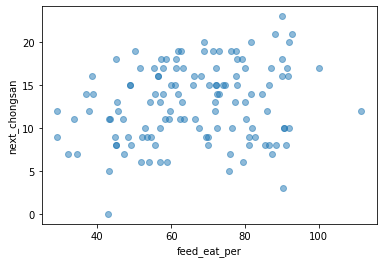

상관계수 :  0.22049325002881842
(0.22049325002881848, 0.012738343949620954)
SpearmanrResult(correlation=0.20987227400304787, pvalue=0.017875179521662562)
KendalltauResult(correlation=0.1490277872898108, pvalue=0.015626217504309734)


In [891]:
test_tmp_2 = test_tmp.dropna()
X = test_tmp_2['B_now_kg'].astype('int')
X1 = test_tmp_2['B_per_now_kg'].astype('float')
Y = test_tmp_2['next_chongsan'].astype('int')
plt.scatter(X1,Y, alpha=0.5)
plt.xlabel('feed_eat_per')
plt.ylabel('next_chongsan')
plt.show()
print('상관계수 : ',np.corrcoef(X1,Y)[0,1])
print(stats.pearsonr(X1,Y))
print(stats.spearmanr(X1,Y))
print(stats.kendalltau(X1,Y))

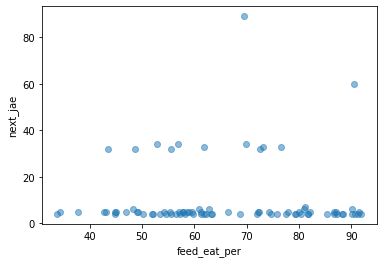

상관계수 :  0.011480565866443426
SpearmanrResult(correlation=-0.15144312969629245, pvalue=0.17440953999690462)
KendalltauResult(correlation=-0.11212544210573175, pvalue=0.18511633725565457)


In [885]:
X1 = test_tmp['B_per_now_kg'].astype('float')
Y = test_tmp['next_jae'].astype('int')
plt.scatter(X1,Y, alpha=0.5)
plt.xlabel('feed_eat_per')
plt.ylabel('next_jae')
plt.show()
print('상관계수 : ',np.corrcoef(X1,Y)[0,1])
print(stats.spearmanr(X1,Y))
print(stats.kendalltau(X1,Y))

In [730]:
ba_pi.columns

Index(['FARM_NO', 'FARM_PIG_NO', 'BUNMAN_SANCHA', 'GYOBAE_DT', 'BUNMAN_DT',
       'CHONGSAN', 'SILSAN', 'EUDUSU', 'EUKG', 'CHOGYOBAE', 'JAE'],
      dtype='object')

### 산차!

In [876]:
one_by_two = test_tmp[test_tmp['next_bunman_sancha'] <= 2]
two_by_seven = test_tmp[(test_tmp['next_bunman_sancha'] > 2) & (test_tmp['next_bunman_sancha'] <= 7)]
seven_by_end = test_tmp[(test_tmp['next_bunman_sancha'] > 7) & (test_tmp['next_bunman_sancha'] <= 20)]

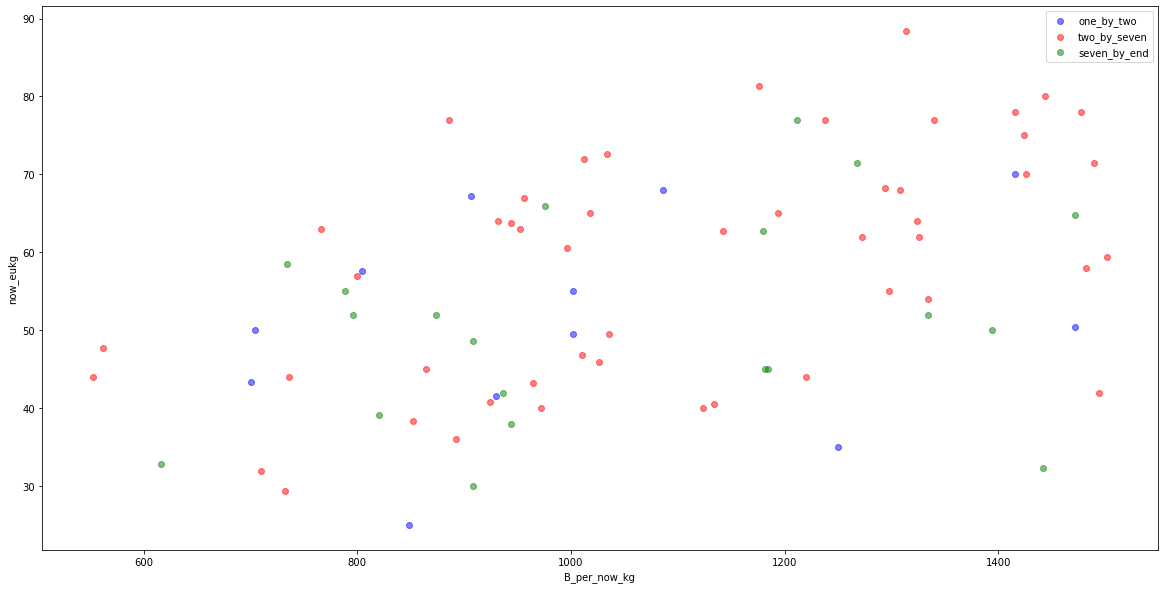

초산 상관계수 :  0.24620524791239942
(0.2462052479123993, 0.4404790264241425)
2산-7산 상관계수 :  0.5228762522277314
(0.5228762522277313, 9.796282477424202e-05)
7산- 상관계수 :  0.2890006891001232
(0.2890006891001233, 0.21652894633949146)


In [892]:
plt.figure(figsize=(20,10))
X1 = one_by_two['B_per_now_kg'].astype('float')
Y1 = one_by_two['now_eukg'].astype('float')
X2 = two_by_seven['B_per_now_kg'].astype('float')
Y2 = two_by_seven['now_eukg'].astype('float')
X3 = seven_by_end['B_per_now_kg'].astype('float')
Y3 = seven_by_end['now_eukg'].astype('float')
plt.scatter(X1,Y1, alpha=0.5, color = 'blue', label = 'one_by_two')
plt.scatter(X2,Y2, alpha=0.5, color = 'red',label = 'two_by_seven')
plt.scatter(X3,Y3, alpha=0.5, color = 'green',label = 'seven_by_end')
plt.legend()
plt.xlabel('B_per_now_kg')
plt.ylabel('now_eukg')
plt.show()
print('초산 상관계수 : ',np.corrcoef(X1,Y1)[0,1])
print(stats.pearsonr(X1,Y1))
print('2산-7산 상관계수 : ',np.corrcoef(X2,Y2)[0,1])
print(stats.pearsonr(X2,Y2))
print('7산- 상관계수 : ',np.corrcoef(X3,Y3)[0,1])
print(stats.pearsonr(X3,Y3))

### 계절!

In [951]:
spring = pd.DataFrame()
summer = pd.DataFrame()
autumn = pd.DataFrame()
winter = pd.DataFrame()

In [952]:
for date in test_tmp['gyobae_dt'].values:
    gyo = datetime.datetime(int(date[:4]),int(date[5:7]),int(date[8:]))
    bun = gyo + datetime.timedelta(days=114)
    if bun.month == 3 or bun.month == 4 or bun.month == 5:
        spring = pd.concat([spring,test_tmp[test_tmp['gyobae_dt'] == date]], axis = 0)
    elif bun.month == 6 or bun.month == 0 or bun.month == 8:
        summer = pd.concat([summer,test_tmp[test_tmp['gyobae_dt'] == date]], axis = 0)
    elif bun.month == 9 or bun.month == 10 or bun.month == 11:
        autumn = pd.concat([autumn,test_tmp[test_tmp['gyobae_dt'] == date]], axis = 0)
    else:
        winter = pd.concat([winter,test_tmp[test_tmp['gyobae_dt'] == date]], axis = 0)

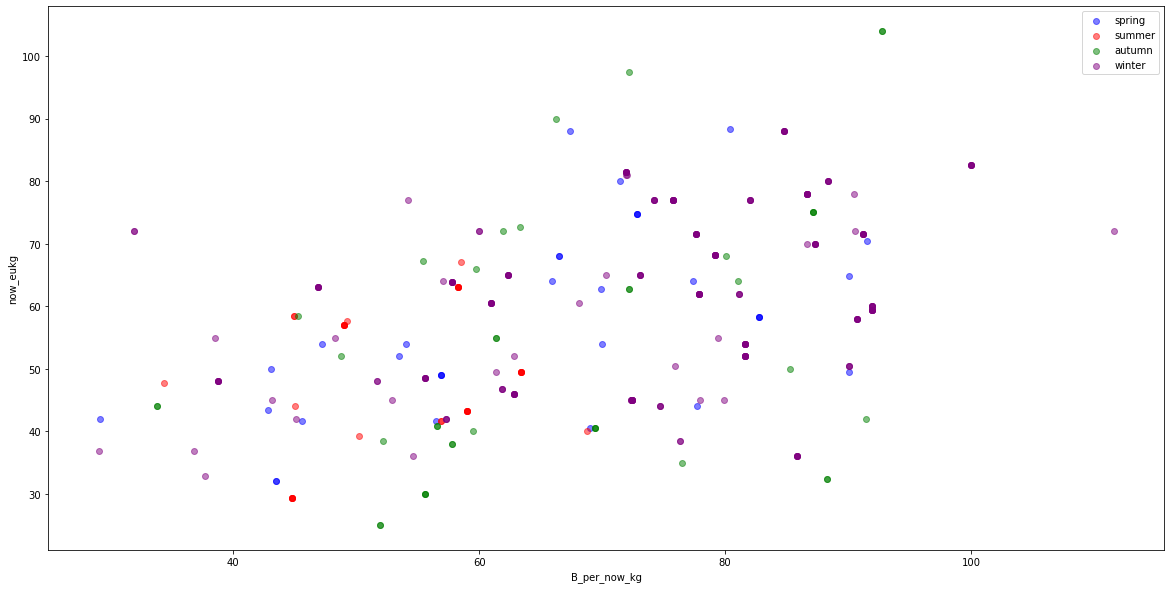

봄 : 65.15312457551958 % 1042.7272727272727 kg
여름 : 53.76814128344115 % 878.5714285714286 kg
가을 : 66.60429085457648 % 1092.0 kg
겨울 : 73.96068753773959 % 1210.520737327189 kg


In [974]:
plt.figure(figsize=(20,10))
X1 = spring['B_per_now_kg'].astype('float')
Y1 = spring['now_eukg'].astype('float')
X2 = summer['B_per_now_kg'].astype('float')
Y2 = summer['now_eukg'].astype('float')
X3 = autumn['B_per_now_kg'].astype('float')
Y3 = autumn['now_eukg'].astype('float')
X4 = winter['B_per_now_kg'].astype('float')
Y4 = winter['now_eukg'].astype('float')
plt.scatter(X1,Y1, alpha=0.5, color = 'blue', label = 'spring')
plt.scatter(X2,Y2, alpha=0.5, color = 'red',label = 'summer')
plt.scatter(X3,Y3, alpha=0.5, color = 'green',label = 'autumn')
plt.scatter(X4,Y4, alpha=0.5, color = 'purple',label = 'winter')
plt.legend()
plt.xlabel('B_per_now_kg')
plt.ylabel('now_eukg')
plt.show()
print('봄 :',spring['B_per_now_kg'].mean(),'%',spring['B_now_kg'].mean(),'kg')
print('여름 :',summer['B_per_now_kg'].mean(),'%',summer['B_now_kg'].mean(),'kg')
print('가을 :',autumn['B_per_now_kg'].mean(),'%',autumn['B_now_kg'].mean(),'kg')
print('겨울 :',winter['B_per_now_kg'].mean(),'%',winter['B_now_kg'].mean(),'kg')

65.15312457551958 1042.7272727272727 
 53.76814128344115 878.5714285714286 
 66.60429085457648 1092.0 
 73.96068753773959 1210.520737327189


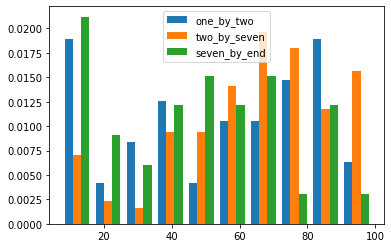

In [353]:
# 히스토그램
plt.hist(x = [X1,X2,X3], density = True, label=['one_by_two','two_by_seven','seven_by_end'])
plt.legend()
plt.show()

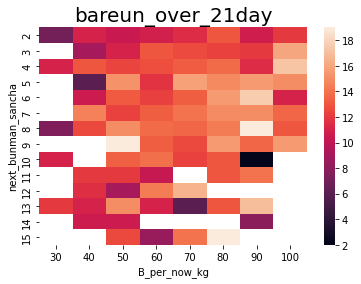

In [476]:
# 히트맵
heatmap = test_tmp[['next_bunman_sancha','B_per_now_kg','next_chongsan']].astype(int)
bins = []
for i in range(11):
    bins.append(i*10)
heatmap['B_per_now_kg'] =np.digitize(heatmap['B_per_now_kg'],bins)*10
pdf = pd.pivot_table(heatmap, aggfunc='mean', 
               index = 'next_bunman_sancha', columns  = 'B_per_now_kg', values = 'next_chongsan')

ax = sns.heatmap(pdf, fmt = 'd')
plt.title('bareun_over_21day', fontsize= 20)
plt.show()
    

In [535]:
test_tmp['B_per_now_kg'] = test_tmp['B_per_now_kg'].astype('float')
test_tmp['next_bunman_sancha'] = test_tmp['next_bunman_sancha'].astype('int')

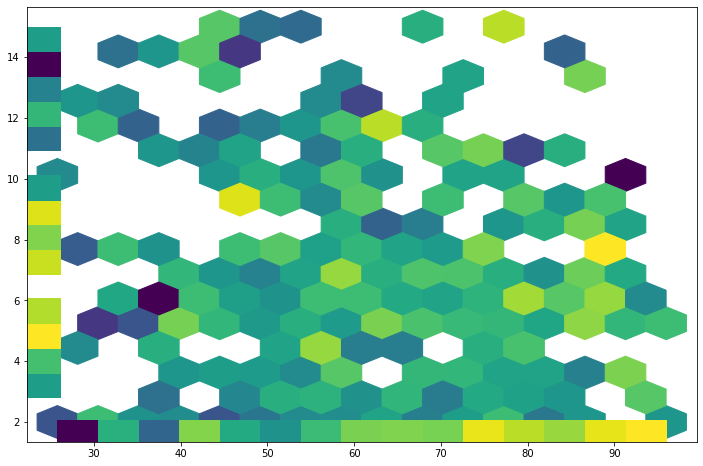

In [555]:
plt.figure(figsize=(12,8))
plt.hexbin(x = test_tmp['B_per_now_kg'], y = test_tmp['next_bunman_sancha'], C = test_tmp['next_chongsan'],
           gridsize=15,marginals = True, cmap = 'viridis')
plt.show()

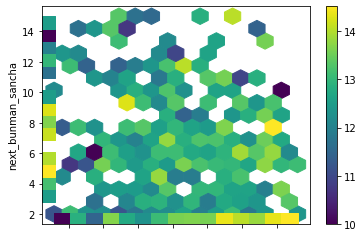

<Figure size 864x576 with 0 Axes>

In [547]:
test_tmp.plot.hexbin(x = 'B_per_now_kg', y = 'next_bunman_sancha',
                     C = 'next_chongsan', gridsize=15,marginals = True,cmap = 'viridis',
                     reduce_C_function=np.mean)
plt.figure(figsize=(12,8))
plt.show()


<AxesSubplot:xlabel='next_bunman_sancha', ylabel='B_per_now_kg'>

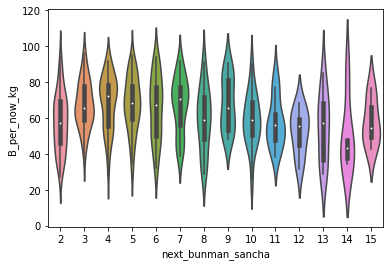

In [550]:
#바이올린플랫
sns.violinplot(y = 'B_per_now_kg', x = 'next_bunman_sancha', data = test_tmp)

<AxesSubplot:xlabel='next_chongsan', ylabel='B_per_now_kg'>

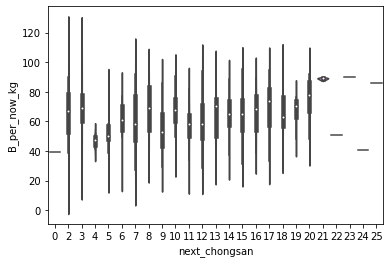

In [551]:
sns.violinplot(y = 'B_per_now_kg', x = 'next_chongsan', data = test_tmp)


In [734]:
ba_pi

,FARM_NO,FARM_PIG_NO,BUNMAN_SANCHA,GYOBAE_DT,BUNMAN_DT,CHONGSAN,SILSAN,EUDUSU,EUKG,CHOGYOBAE,JAE
0,1387,9530,1,20100727,20101113,6,3,7,33.6,NaN,NaN
1,1387,9530,2,20110128,20110522,14,14,9,88.2,NaN,43.0
2,1387,9530,3,20110628,20111021,15,15,10,55.0,NaN,5.0
3,1387,9530,4,20120102,20120424,17,15,10,75.0,NaN,NaN
4,1387,9530,5,20120529,20120921,13,13,9,63.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
3074,1387,102-46,1,20211223,20220417,9,9,9,50.4,368.0,NaN
3075,1387,101-22,1,20211224,20220417,12,11,9,45.9,369.0,NaN
3076,1387,102-78,1,20211224,20220413,10,4,0,0.0,369.0,NaN
3077,1387,102-34,1,20211222,20220414,6,3,10,40.0,367.0,NaN


In [737]:
(ba_pi['EUKG']/ba_pi['EUDUSU']).mean()

5.760110409934351

In [738]:
(non_pi['EUKG']/non_pi['EUDUSU']).mean()

0.0

In [739]:
(hong_pi['EUKG']/hong_pi['EUDUSU']).mean()

5.115401496069002

#### 분만사 입식 후 언제 얼마나 먹었는지도 중요할까?